In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, t, f
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import pearsonr, t as t_dist
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

## –ó–∞–¥–∞–Ω–∏–µ ‚Ññ1. –ü—Ä–æ–≤–µ–¥–∏—Ç–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö –∏–∑ —Ñ–∞–π–ª–∞ 'ex1.csv' –ø–æ –ü–∏—Ä—Å–æ–Ω—É

In [3]:
# —Å—á–∏—Ç—ã–≤–∞–Ω–∏–µ —Ñ–∞–π–ª–∞
df1 = pd.read_csv('ex1.csv') 

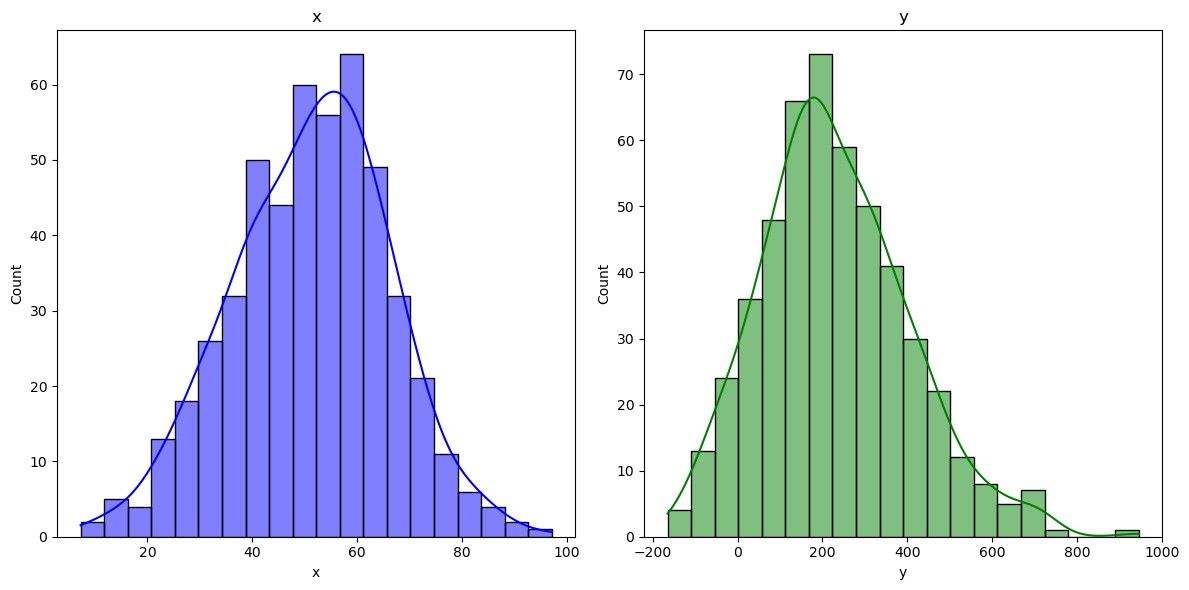

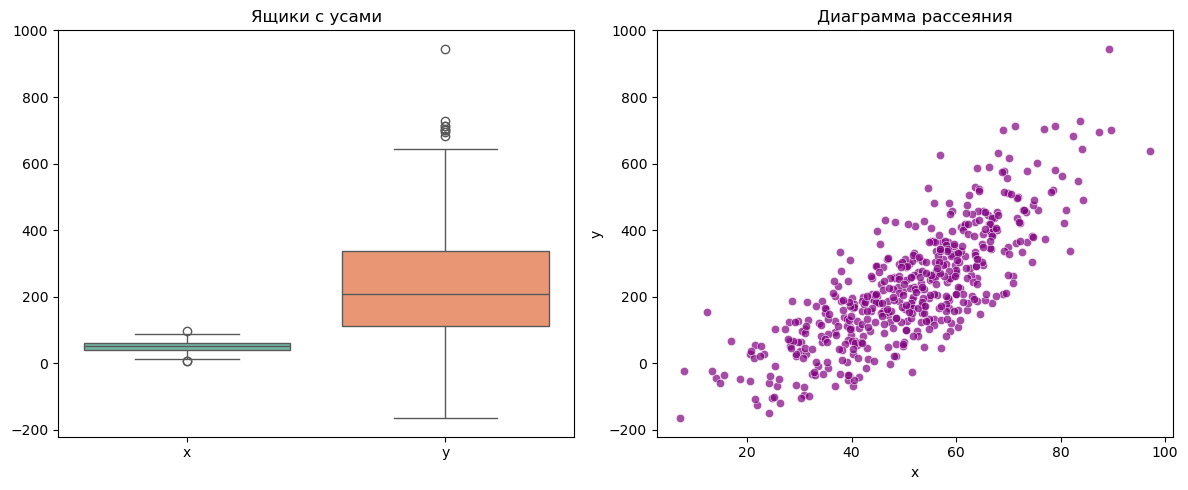


–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞:
–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ü–∏—Ä—Å–æ–Ω–∞: 0.803
P-–∑–Ω–∞—á–µ–Ω–∏–µ: 3.974e-114

–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è —Å–∏–ª—å–Ω–∞—è.


In [4]:
def analyze_data(data):
    """–ó–∞–≥—Ä—É–∂–∞–µ—Ç –¥–∞–Ω–Ω—ã–µ, –ø—Ä–æ–≤–µ—Ä—è–µ—Ç –∏—Ö –Ω–∞ —á–∏—Å–ª–æ–≤—ã–µ —Ç–∏–ø—ã, —Å—Ç—Ä–æ–∏—Ç –≥—Ä–∞—Ñ–∏–∫–∏ –∏ –≤—ã—á–∏—Å–ª—è–µ—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –ü–∏—Ä—Å–æ–Ω–∞."""
    try:
        # –ü—Ä–æ–≤–µ—Ä–∫–∞ —á–∏—Å–ª–æ–≤—ã—Ö —Ç–∏–ø–æ–≤
        if not data.select_dtypes(include=['float64', 'int64']).equals(data):
            raise ValueError("–î–∞–Ω–Ω—ã–µ —Å–æ–¥–µ—Ä–∂–∞—Ç –Ω–µ—á–∏—Å–ª–æ–≤—ã–µ —Å—Ç–æ–ª–±—Ü—ã.")

        # –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
        plt.figure(figsize=(12, 6))

        # –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã
        plt.subplot(1, 2, 1)
        sns.histplot(data['x'], kde=True, bins=20, color='blue')
        plt.title('x')
        plt.subplot(1, 2, 2)
        sns.histplot(data['y'], kde=True, bins=20, color='green')
        plt.title('y')
        plt.tight_layout()
        plt.show()

        # –Ø—â–∏–∫ —Å —É—Å–∞–º–∏ –∏ –¥–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å—Å–µ—è–Ω–∏—è –Ω–∞ –æ–¥–Ω–æ–π —Å—Ç—Ä–æ–∫–µ
        plt.figure(figsize=(12, 5))  # –ò–∑–º–µ–Ω–µ–Ω–æ: —Ä–∞–∑–º–µ—Ä —Ñ–∏–≥—É—Ä—ã

        plt.subplot(1, 2, 1)
        sns.boxplot(data=data, orient="v", palette="Set2")
        plt.title('–Ø—â–∏–∫–∏ —Å —É—Å–∞–º–∏')

        plt.subplot(1, 2, 2)
        sns.scatterplot(x=data['x'], y=data['y'], alpha=0.7, color='purple')
        plt.title('–î–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å—Å–µ—è–Ω–∏—è')

        plt.tight_layout()
        plt.show()

        # –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ü–∏—Ä—Å–æ–Ω–∞
        corr_analysis(data)

    except FileNotFoundError:
        print(f"–û—à–∏–±–∫–∞: —Ñ–∞–π–ª {file_path} –Ω–µ –Ω–∞–π–¥–µ–Ω.")
    except ValueError as e:
        print(f"–û—à–∏–±–∫–∞: {e}")
def corr_analysis(data):
    corr_coeff, p_value = pearsonr(data['x'], data['y'])
    print("\n–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞:")
    print(f"–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ü–∏—Ä—Å–æ–Ω–∞: {corr_coeff:.3f}")
    print(f"P-–∑–Ω–∞—á–µ–Ω–∏–µ: {p_value:.3e}")
    if abs(corr_coeff) > 0.7:
        print("\n–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è —Å–∏–ª—å–Ω–∞—è.")
    else:
        print("\n–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è —Å–ª–∞–±–∞—è.")

# –ó–∞–ø—É—Å–∫ –∞–Ω–∞–ª–∏–∑–∞
analyze_data(df1)

**–í—ã–≤–æ–¥:**

–ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑, –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω—ã–π —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ü–∏—Ä—Å–æ–Ω–∞, –≤—ã—è–≤–∏–ª —Å–∏–ª—å–Ω—É—é –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—É—é –ª–∏–Ω–µ–π–Ω—É—é —Å–≤—è–∑—å –º–µ–∂–¥—É –∞–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º—ã–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏. –ó–Ω–∞—á–µ–Ω–∏–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ü–∏—Ä—Å–æ–Ω–∞ —Ä–∞–≤–Ω–æ 0.803, —á—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ –≤—ã—Å–æ–∫—É—é —Å—Ç–µ–ø–µ–Ω—å –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∏. –ö—Ä–∞–π–Ω–µ –Ω–∏–∑–∫–æ–µ p-–∑–Ω–∞—á–µ–Ω–∏–µ (3.974e-114) —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤—É–µ—Ç –æ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–π –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ —ç—Ç–æ–π —Å–≤—è–∑–∏.  –ê–Ω–∞–ª–∏–∑ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º –ø–æ–∫–∞–∑–∞–ª, —á—Ç–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –æ–±–µ–∏—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –±–ª–∏–∑–∫–∏ –∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É.  –ù–∞ —è—â–∏–∫–µ —Å —É—Å–∞–º–∏ –Ω–∞–±–ª—é–¥–∞—é—Ç—Å—è –Ω–µ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–µ –≤—ã–±—Ä–æ—Å—ã. –î–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å—Å–µ—è–Ω–∏—è –ø—Ä–æ–¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä–æ–≤–∞–ª–∞ –ª–∏–Ω–µ–π–Ω—É—é –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å. –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –ø—Ä–µ–¥–ø–æ—Å—ã–ª–∫–∏ –¥–ª—è –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ü–∏—Ä—Å–æ–Ω–∞ –≤—ã–ø–æ–ª–Ω–µ–Ω—ã, –∏ –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã —è–≤–ª—è—é—Ç—Å—è –Ω–∞–¥–µ–∂–Ω—ã–º–∏.  –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ü–∏—Ä—Å–æ–Ω–∞ –≤ –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –æ–ø—Ä–∞–≤–¥–∞–Ω–æ, –∏ –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–æ–∑–≤–æ–ª—è—é—Ç —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥ –æ –Ω–∞–ª–∏—á–∏–∏ —Å–∏–ª—å–Ω–æ–π –ª–∏–Ω–µ–π–Ω–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –º–µ–∂–¥—É –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏.


In [6]:
# –í—ã—á–∏—Å–ª–µ–Ω–∏–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ü–∏—Ä—Å–æ–Ω–∞ –∏ p-–∑–Ω–∞—á–µ–Ω–∏—è
correlation_coefficient, p_val = pearsonr(df1['x'], df1['y'])

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π
num_observations = len(df1)

# –í—ã—á–∏—Å–ª–µ–Ω–∏–µ t-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏
t_statistic = correlation_coefficient * ((num_observations - 2) ** 0.5) / ((1 - correlation_coefficient ** 2) ** 0.5)

# –ü–æ–ª—É—á–µ–Ω–∏–µ –∫—Ä–∏—Ç–∏—á–µ—Å–∫–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è t –¥–ª—è –¥–≤—É—Å—Ç–æ—Ä–æ–Ω–Ω–µ–≥–æ —Ç–µ—Å—Ç–∞ –ø—Ä–∏ —É—Ä–æ–≤–Ω–µ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ 0.05
alpha_level = 0.05
t_critical_value = t_dist.ppf(1 - alpha_level / 2, df=num_observations - 2)

# –ü–µ—á–∞—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –∞–Ω–∞–ª–∏–∑–∞
print("–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –∞–Ω–∞–ª–∏–∑–∞:")
print(f"–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ü–∏—Ä—Å–æ–Ω–∞: {correlation_coefficient:.3f}")
print(f"P-–∑–Ω–∞—á–µ–Ω–∏–µ: {p_val:.3e}")
print(f"t-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: {t_statistic:.3f}")
print(f"–ö—Ä–∏—Ç–∏—á–µ—Å–∫–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ t (–ø—Ä–∏ Œ± = 0.05): ¬±{t_critical_value:.3f}")

# –û—Ü–µ–Ω–∫–∞ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ —Å–≤—è–∑–∏
if abs(t_statistic) > t_critical_value:
    print("\n–°–≤—è–∑—å —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–∞. –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–∞.")
else:
    print("\n‚ö†–°–≤—è–∑—å –Ω–µ —è–≤–ª—è–µ—Ç—Å—è —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–æ–π. –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏ —Å–ª–∞–±–∞—è –∏–ª–∏ –æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç.")

# –û—Ü–µ–Ω–∫–∞ —Å–∏–ª—ã –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏
if abs(correlation_coefficient) > 0.7:
    print("–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è —Å–∏–ª—å–Ω–∞—è.")
elif abs(correlation_coefficient) > 0.3:
    print("–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è —É–º–µ—Ä–µ–Ω–Ω–∞—è.")
else:
    print("–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è —Å–ª–∞–±–∞—è.")


–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –∞–Ω–∞–ª–∏–∑–∞:
–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ü–∏—Ä—Å–æ–Ω–∞: 0.803
P-–∑–Ω–∞—á–µ–Ω–∏–µ: 3.974e-114
t-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: 30.092
–ö—Ä–∏—Ç–∏—á–µ—Å–∫–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ t (–ø—Ä–∏ Œ± = 0.05): ¬±1.965

–°–≤—è–∑—å —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–∞. –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–∞.
–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è —Å–∏–ª—å–Ω–∞—è.


**–í—ã–≤–æ–¥:**

–ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –≤—ã—è–≤–∏–ª —Å–∏–ª—å–Ω—É—é —Å–≤—è–∑—å (r = 0.803) –º–µ–∂–¥—É –∞–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º—ã–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏. –≠—Ç–∞ —Å–≤—è–∑—å —è–≤–ª—è–µ—Ç—Å—è —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–æ–π (p < 0.001), —á—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ –≤—ã—Å–æ–∫—É—é —Å—Ç–µ–ø–µ–Ω—å –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∏. –ó–Ω–∞—á–µ–Ω–∏–µ p-–∑–Ω–∞—á–µ–Ω–∏—è –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –Ω–∏–∂–µ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–≥–æ —É—Ä–æ–≤–Ω—è –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ (–æ–±—ã—á–Ω–æ 0.05), —á—Ç–æ –ø–æ–∑–≤–æ–ª—è–µ—Ç –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É –æ–± –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–∏ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏. –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –∞–Ω–∞–ª–∏–∑–∞ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞—é—Ç –Ω–∞–ª–∏—á–∏–µ –∑–Ω–∞—á–∏–º–æ–π —Å–≤—è–∑–∏ –º–µ–∂–¥—É –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏.

## –ó–∞–¥–∞–Ω–∏–µ ‚Ññ2. –ü—Ä–æ–≤–µ–¥–∏—Ç–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö –∏–∑ —Ñ–∞–π–ª–∞ 'ex2.csv' –ø–æ –°–ø–∏—Ä–º–µ–Ω—É

In [9]:
# —Å—á–∏—Ç—ã–≤–∞–Ω–∏–µ —Ñ–∞–π–ª–∞
df2 = pd.read_csv('ex2.csv') 

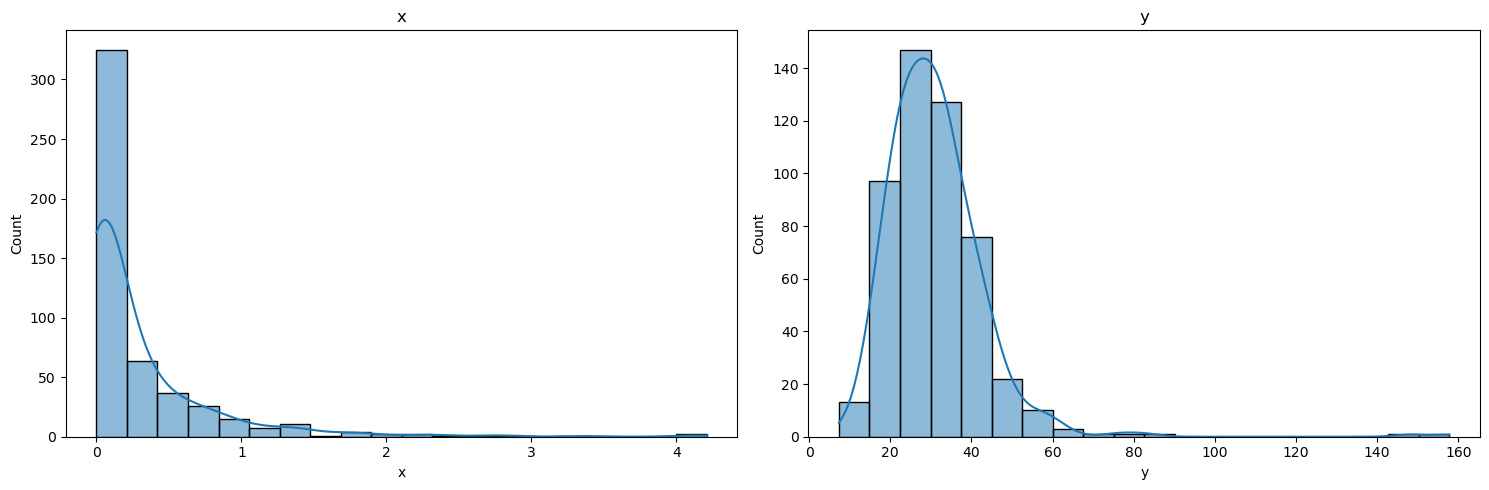

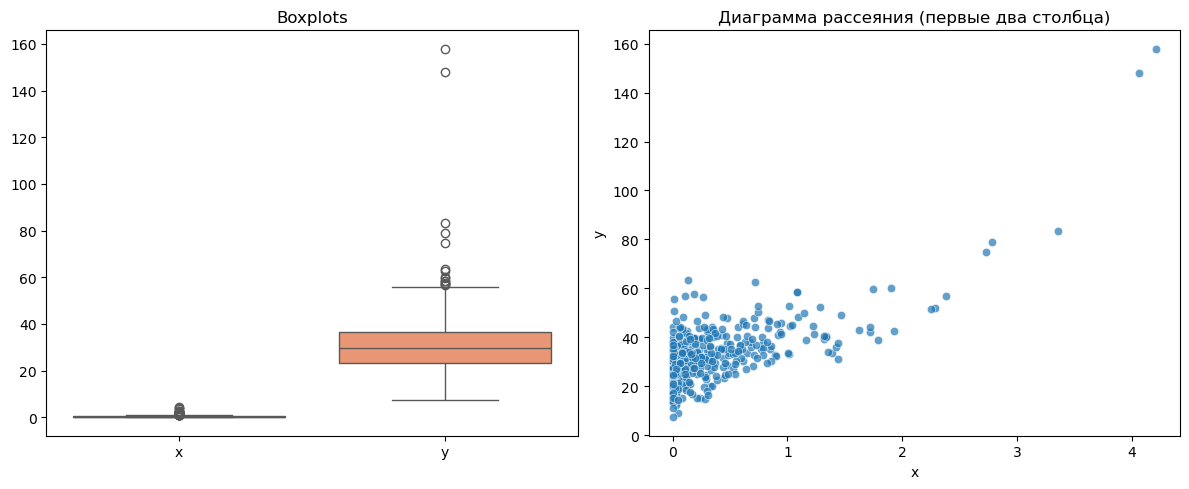

<Figure size 1000x800 with 0 Axes>

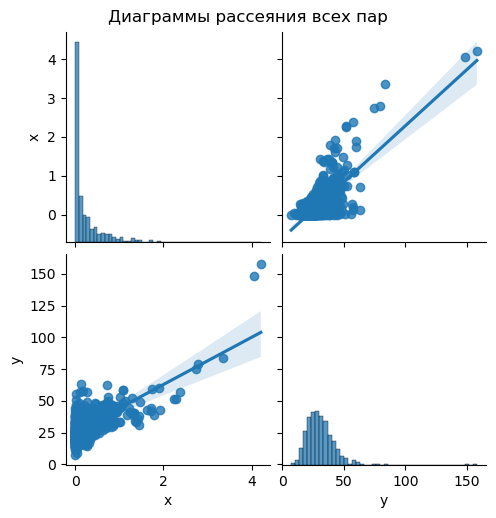


–ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞ (–°–ø–∏—Ä–º–µ–Ω):
           x         y
x  1.000000  0.617087
y  0.617087  1.000000

–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –°–ø–∏—Ä–º–µ–Ω–∞ –º–µ–∂–¥—É x –∏ y:
–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏: 0.617
P-–∑–Ω–∞—á–µ–Ω–∏–µ: 8.472e-54
–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è —É–º–µ—Ä–µ–Ω–Ω–∞—è


In [10]:
def analyze_data(data):
    """
    –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ—Ç –¥–∞–Ω–Ω—ã–µ: –ø—Ä–æ–≤–µ—Ä—è–µ—Ç —á–∏—Å–ª–æ–≤—ã–µ —Ç–∏–ø—ã, —Å—Ç—Ä–æ–∏—Ç –≥—Ä–∞—Ñ–∏–∫–∏ –∏ –≤—ã—á–∏—Å–ª—è–µ—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –°–ø–∏—Ä–º–µ–Ω–∞.
    """
    try:
        # –ü—Ä–æ–≤–µ—Ä–∫–∞ —á–∏—Å–ª–æ–≤—ã—Ö —Ç–∏–ø–æ–≤
        numeric_data = data.select_dtypes(include=['number'])
        if numeric_data.empty:
            raise ValueError("DataFrame –Ω–µ —Å–æ–¥–µ—Ä–∂–∏—Ç —á–∏—Å–ª–æ–≤—ã—Ö —Å—Ç–æ–ª–±—Ü–æ–≤.")
        if not numeric_data.equals(data):
            print("–í–Ω–∏–º–∞–Ω–∏–µ: DataFrame —Å–æ–¥–µ—Ä–∂–∏—Ç –Ω–µ—á–∏—Å–ª–æ–≤—ã–µ —Å—Ç–æ–ª–±—Ü—ã. –ê–Ω–∞–ª–∏–∑ –±—É–¥–µ—Ç –ø—Ä–æ–≤–µ–¥–µ–Ω —Ç–æ–ª—å–∫–æ –¥–ª—è —á–∏—Å–ª–æ–≤—ã—Ö.")

        num_cols = len(numeric_data.columns)
        if num_cols == 1:
            print("–î–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –≥—Ä–∞—Ñ–∏–∫–æ–≤ —Ç—Ä–µ–±—É–µ—Ç—Å—è —Ö–æ—Ç—è –±—ã –¥–≤–∞ —á–∏—Å–ª–æ–≤—ã—Ö —Å—Ç–æ–ª–±—Ü–∞.")
            return

        # –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã
        plt.figure(figsize=(15, 5))  
        for i, col in enumerate(numeric_data.columns):
            plt.subplot(1, num_cols, i+1)
            sns.histplot(numeric_data[col], kde=True, bins=20)
            plt.title(col)
        plt.tight_layout()
        plt.show()

        # Boxplot –∏ –¥–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å—Å–µ—è–Ω–∏—è –Ω–∞ –æ–¥–Ω–æ–π —Å—Ç—Ä–æ–∫–µ
        if num_cols >= 2:
            plt.figure(figsize=(12, 5))

            plt.subplot(1, 2, 1)
            sns.boxplot(data=numeric_data, orient="v", palette="Set2")
            plt.title('Boxplots')

            plt.subplot(1, 2, 2)
            sns.scatterplot(x=numeric_data.columns[0], y=numeric_data.columns[1], data=numeric_data, alpha=0.7)
            plt.title('–î–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å—Å–µ—è–Ω–∏—è (–ø–µ—Ä–≤—ã–µ –¥–≤–∞ —Å—Ç–æ–ª–±—Ü–∞)')

            plt.tight_layout()
            plt.show()
        else:
            print("–î–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –¥–∏–∞–≥—Ä–∞–º–º—ã —Ä–∞—Å—Å–µ—è–Ω–∏—è –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –¥–≤–∞ –∏–ª–∏ –±–æ–ª–µ–µ —Å—Ç–æ–ª–±—Ü–æ–≤")

        # –î–ª—è –±–æ–ª–µ–µ –ø–æ–ª–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞,  –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å pairplot –¥–ª—è –≤—Å–µ—Ö –ø–∞—Ä —Å—Ç–æ–ª–±—Ü–æ–≤
        if num_cols >=2:
            plt.figure(figsize=(10, 8))
            sns.pairplot(numeric_data, kind="reg")
            plt.suptitle("–î–∏–∞–≥—Ä–∞–º–º—ã —Ä–∞—Å—Å–µ—è–Ω–∏—è –≤—Å–µ—Ö –ø–∞—Ä", y=1.02)
            plt.show()


        # –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –°–ø–∏—Ä–º–µ–Ω–∞
        corr_matrix = numeric_data.corr(method='spearman')
        print("\n–ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞ (–°–ø–∏—Ä–º–µ–Ω):\n", corr_matrix)

        for i in range(num_cols):
            for j in range(i + 1, num_cols):  # –ò–∑–±–µ–≥–∞–µ–º –¥—É–±–ª–∏—Ä–æ–≤–∞–Ω–∏—è –∏ –¥–∏–∞–≥–æ–Ω–∞–ª–∏
                col1 = numeric_data.columns[i]
                col2 = numeric_data.columns[j]
                corr_coeff, p_value = spearmanr(numeric_data[col1], numeric_data[col2])
                print(f"\n–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –°–ø–∏—Ä–º–µ–Ω–∞ –º–µ–∂–¥—É {col1} –∏ {col2}:")
                print(f"–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏: {corr_coeff:.3f}")
                print(f"P-–∑–Ω–∞—á–µ–Ω–∏–µ: {p_value:.3e}")
                if abs(corr_coeff) > 0.7:
                    print("–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è —Å–∏–ª—å–Ω–∞—è.")
                elif abs(corr_coeff) > 0.3:
                    print("–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è —É–º–µ—Ä–µ–Ω–Ω–∞—è")                
                else:
                    print("–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è —Å–ª–∞–±–∞—è.")


    except ValueError as e:
        print(f"–û—à–∏–±–∫–∞: {e}")
    except Exception as e:
        print(f"–ü—Ä–æ–∏–∑–æ—à–ª–∞ –Ω–µ–ø—Ä–µ–¥–≤–∏–¥–µ–Ω–Ω–∞—è –æ—à–∏–±–∫–∞: {e}")



analyze_data(df2)

**–í—ã–≤–æ–¥:**

–ê–Ω–∞–ª–∏–∑ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –º–µ–∂–¥—É –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏ x –∏ y –±—ã–ª –ø—Ä–æ–≤–µ–¥–µ–Ω —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –°–ø–∏—Ä–º–µ–Ω–∞, –∫–æ—Ç–æ—Ä—ã–π –ø–æ–∫–∞–∑–∞–ª —É–º–µ—Ä–µ–Ω–Ω—É—é –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—É—é —Å–≤—è–∑—å (r<sub>s</sub> = 0.617, p < 0.001).  –í—ã–±–æ—Ä –º–µ—Ç–æ–¥–∞ –°–ø–∏—Ä–º–µ–Ω–∞ –±—ã–ª –ø—Ä–µ–¥–ø–æ—á—Ç–∏—Ç–µ–ª—å–Ω–µ–µ, —á–µ–º –º–µ—Ç–æ–¥ –ü–∏—Ä—Å–æ–Ω–∞, –ø—Ä–∏ —É—Å–ª–æ–≤–∏–∏, —á—Ç–æ –ø—Ä–µ–¥—à–µ—Å—Ç–≤—É—é—â–∏–µ –≥—Ä–∞—Ñ–∏–∫–∏ (–≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã –∏ –¥–∏–∞–≥—Ä–∞–º–º—ã —Ä–∞—Å—Å–µ—è–Ω–∏—è) –ø–æ–∫–∞–∑–∞–ª–∏ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –æ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö  –∏–ª–∏ –Ω–∞–ª–∏—á–∏–µ —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –≤—ã–±—Ä–æ—Å–æ–≤.  –ú–µ—Ç–æ–¥ –°–ø–∏—Ä–º–µ–Ω–∞, –≤ –æ—Ç–ª–∏—á–∏–µ –æ—Ç –º–µ—Ç–æ–¥–∞ –ü–∏—Ä—Å–æ–Ω–∞, –Ω–µ –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∏ –±–æ–ª–µ–µ —É—Å—Ç–æ–π—á–∏–≤ –∫ –≤–ª–∏—è–Ω–∏—é –≤—ã–±—Ä–æ—Å–æ–≤.

–ï—Å–ª–∏ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã –¥–ª—è x –∏ y –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä–æ–≤–∞–ª–∏ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –æ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è (–Ω–∞–ø—Ä–∏–º–µ—Ä, —Å–∫–æ—à–µ–Ω–Ω–æ—Å—Ç—å, –º–Ω–æ–≥–æ–º–æ–¥–∞–ª—å–Ω–æ—Å—Ç—å), –∏–ª–∏ –¥–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å—Å–µ—è–Ω–∏—è –ø–æ–∫–∞–∑—ã–≤–∞–ª–∞ –Ω–µ–ª–∏–Ω–µ–π–Ω—É—é –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –º–µ–∂–¥—É –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏, –∏–ª–∏ –ø—Ä–∏—Å—É—Ç—Å—Ç–≤–æ–≤–∞–ª–∏ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–µ –≤—ã–±—Ä–æ—Å—ã,  —Ç–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –Ω–µ–ø–∞—Ä–∞–º–µ—Ç—Ä–∏—á–µ—Å–∫–æ–≥–æ –º–µ—Ç–æ–¥–∞ –°–ø–∏—Ä–º–µ–Ω–∞ –±—ã–ª–æ –æ–ø—Ä–∞–≤–¥–∞–Ω–Ω—ã–º –≤—ã–±–æ—Ä–æ–º –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –Ω–∞–¥–µ–∂–Ω–æ–π –æ—Ü–µ–Ω–∫–∏ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏.  –í –ø—Ä–æ—Ç–∏–≤–Ω–æ–º —Å–ª—É—á–∞–µ, –µ—Å–ª–∏ –±—ã –¥–∞–Ω–Ω—ã–µ –±—ã–ª–∏ –±–ª–∏–∑–∫–∏ –∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é –∏ –±–µ–∑ –≤—ã—Ä–∞–∂–µ–Ω–Ω—ã—Ö –≤—ã–±—Ä–æ—Å–æ–≤, —Ç–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ü–∏—Ä—Å–æ–Ω–∞ –±—ã–ª–æ –±—ã –±–æ–ª–µ–µ –ø—Ä–µ–¥–ø–æ—á—Ç–∏—Ç–µ–ª—å–Ω—ã–º.

In [12]:
# –í—ã—á–∏—Å–ª–µ–Ω–∏–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ü–∏—Ä—Å–æ–Ω–∞
corr_coeff, p_value = pearsonr(df2['x'], df2['y'])

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π
n = len(df2)

# –†–∞—Å—á–µ—Ç t-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏
t_stat = corr_coeff * ((n - 2) ** 0.5) / ((1 - corr_coeff**2) ** 0.5)

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫—Ä–∏—Ç–∏—á–µ—Å–∫–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è t –¥–ª—è –¥–≤—É—Å—Ç–æ—Ä–æ–Ω–Ω–µ–≥–æ —Ç–µ—Å—Ç–∞ –Ω–∞ —É—Ä–æ–≤–Ω–µ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ 0.05
alpha = 0.05
t_critical = t.ppf(1 - alpha / 2, df=n - 2)

# –ü–µ—á–∞—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
print("–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –∞–Ω–∞–ª–∏–∑–∞:")
print(f"–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ü–∏—Ä—Å–æ–Ω–∞: {corr_coeff:.3f}")
print(f"P-–∑–Ω–∞—á–µ–Ω–∏–µ: {p_value:.3e}")
print(f"t-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: {t_stat:.3f}")
print(f"–ö—Ä–∏—Ç–∏—á–µ—Å–∫–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ t (–ø—Ä–∏ Œ± = 0.05): ¬±{t_critical:.3f}")

# –û—Ü–µ–Ω–∫–∞ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏
if abs(t_stat) > t_critical:
    print("\n–°–≤—è–∑—å —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–∞. –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É –≤–µ–ª–∏—á–∏–Ω–∞–º–∏ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–∞.")
else:
    print("\n–°–≤—è–∑—å –Ω–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–∞. –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É –≤–µ–ª–∏—á–∏–Ω–∞–º–∏ —Å–ª–∞–±–∞—è –∏–ª–∏ –æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç.")

# –û—Ü–µ–Ω–∫–∞ —Å—Ç–µ–ø–µ–Ω–∏ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏
if abs(corr_coeff) > 0.7:
    print("–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è —Å–∏–ª—å–Ω–∞—è.")
elif abs(corr_coeff) > 0.3:
    print("–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è —É–º–µ—Ä–µ–Ω–Ω–∞—è.")
else:
    print("–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è —Å–ª–∞–±–∞—è.")

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –∞–Ω–∞–ª–∏–∑–∞:
–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ü–∏—Ä—Å–æ–Ω–∞: 0.733
P-–∑–Ω–∞—á–µ–Ω–∏–µ: 1.711e-85
t-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: 24.071
–ö—Ä–∏—Ç–∏—á–µ—Å–∫–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ t (–ø—Ä–∏ Œ± = 0.05): ¬±1.965

–°–≤—è–∑—å —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–∞. –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É –≤–µ–ª–∏—á–∏–Ω–∞–º–∏ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–∞.
–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è —Å–∏–ª—å–Ω–∞—è.


**–í—ã–≤–æ–¥:**

–ú–µ–∂–¥—É –∞–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º—ã–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–∞—è —Å–∏–ª—å–Ω–∞—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å. –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ü–∏—Ä—Å–æ–Ω–∞ (0.733) —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ –Ω–∞–ª–∏—á–∏–µ —Å–≤—è–∑–∏ –≤—ã—Å–æ–∫–æ–π —Å–∏–ª—ã, —á—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –æ–¥–Ω–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π, –∫–∞–∫ –ø—Ä–∞–≤–∏–ª–æ, —Å–æ–ø—Ä–æ–≤–æ–∂–¥–∞—é—Ç—Å—è –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–∏–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –¥—Ä—É–≥–æ–π. –°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∞—è –∑–Ω–∞—á–∏–º–æ—Å—Ç—å –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç—Å—è –∫–∞–∫ –Ω–∏–∑–∫–∏–º p-–∑–Ω–∞—á–µ–Ω–∏–µ–º, –ø–æ–ª—É—á–µ–Ω–Ω—ã–º –∏–∑ —Ä–∞—Å—á–µ—Ç–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ü–∏—Ä—Å–æ–Ω–∞ (p < 0.001), —Ç–∞–∫ –∏ –Ω–∏–∑–∫–∏–º p-–∑–Ω–∞—á–µ–Ω–∏–µ–º t-–∫—Ä–∏—Ç–µ—Ä–∏—è (p < 0.001), —á—Ç–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç –¥–æ—Å—Ç–æ–≤–µ—Ä–Ω–æ—Å—Ç—å –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏. –í—ã—Å–æ–∫–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ t-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ (24.071) –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç –∑–Ω–∞—á–∏–º–æ—Å—Ç—å –ø–æ–ª—É—á–µ–Ω–Ω–æ–π —Å–≤—è–∑–∏.

## –ó–∞–¥–∞–Ω–∏–µ ‚Ññ3. –ü—Ä–æ–≤–µ–¥–∏—Ç–µ –ª–∏–Ω–µ–π–Ω—ã–π —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö –∏–∑ —Ñ–∞–π–ª–∞ 'ex3.csv'

In [15]:
# —Å—á–∏—Ç—ã–≤–∞–Ω–∏–µ —Ñ–∞–π–ª–∞
df3 = pd.read_csv('ex3.csv') 

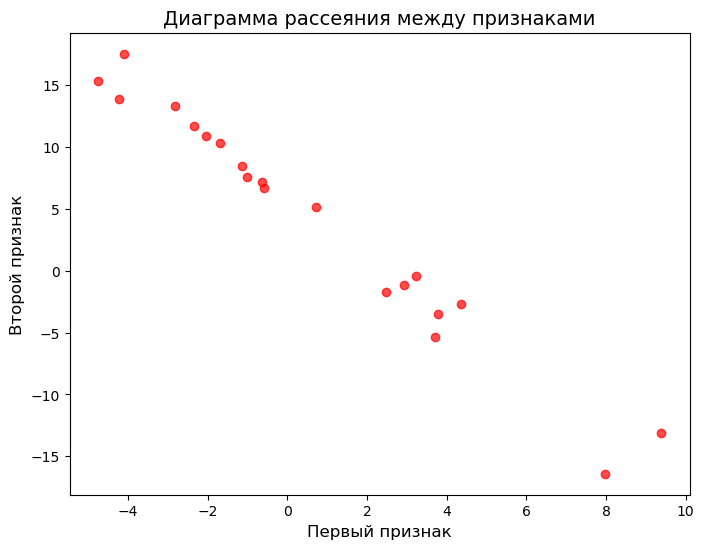


–û–±–æ—Å–Ω–æ–≤–∞–Ω–∏–µ:
–î–ª—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ü–∏—Ä—Å–æ–Ω–∞ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å —á–∏—Å–ª–æ–≤—ã–º–∏ –∏ –∏–º–µ—Ç—å –ª–∏–Ω–µ–π–Ω—É—é —Å–≤—è–∑—å.
–í—Å–µ —Å—Ç–æ–ª–±—Ü—ã —á–∏—Å–ª–æ–≤—ã–µ. –ú–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –ü–∏—Ä—Å–æ–Ω–∞.

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞:
–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ü–∏—Ä—Å–æ–Ω–∞: -0.985
P-–∑–Ω–∞—á–µ–Ω–∏–µ: 3.176e-15


In [16]:
# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –¥–∏–∞–≥—Ä–∞–º–º—ã —Ä–∞—Å—Å–µ—è–Ω–∏—è
plt.figure(figsize=(8, 6))
plt.scatter(df3.iloc[:, 0], df3.iloc[:, 1], alpha=0.7, color='red')
plt.title('–î–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å—Å–µ—è–Ω–∏—è –º–µ–∂–¥—É –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏', fontsize=14)
plt.xlabel('–ü–µ—Ä–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫', fontsize=12)
plt.ylabel('–í—Ç–æ—Ä–æ–π –ø—Ä–∏–∑–Ω–∞–∫', fontsize=12)
plt.show()

# –í—ã–≤–æ–¥ –æ —Ü–µ–ª–µ—Å–æ–æ–±—Ä–∞–∑–Ω–æ—Å—Ç–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ü–∏—Ä—Å–æ–Ω–∞
print("\n–û–±–æ—Å–Ω–æ–≤–∞–Ω–∏–µ:")
print("–î–ª—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ü–∏—Ä—Å–æ–Ω–∞ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å —á–∏—Å–ª–æ–≤—ã–º–∏ –∏ –∏–º–µ—Ç—å –ª–∏–Ω–µ–π–Ω—É—é —Å–≤—è–∑—å.")

# –ü—Ä–æ–≤–µ—Ä–∫–∞: –≤—Å–µ –ª–∏ –¥–∞–Ω–Ω—ã–µ —á–∏—Å–ª–æ–≤—ã–µ
if df3.select_dtypes(include=['float64', 'int64']).equals(df3):
    print("–í—Å–µ —Å—Ç–æ–ª–±—Ü—ã —á–∏—Å–ª–æ–≤—ã–µ. –ú–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –ü–∏—Ä—Å–æ–Ω–∞.")
else:
    print("–î–∞–Ω–Ω—ã–µ —Å–æ–¥–µ—Ä–∂–∞—Ç –Ω–µ—á–∏—Å–ª–æ–≤—ã–µ —Å—Ç–æ–ª–±—Ü—ã. –ü—Ä–æ–≤–µ—Ä—å—Ç–µ –¥–∞–Ω–Ω—ã–µ –ø–µ—Ä–µ–¥ –∞–Ω–∞–ª–∏–∑–æ–º.")
    raise ValueError("–î–∞–Ω–Ω—ã–µ —Å–æ–¥–µ—Ä–∂–∞—Ç –Ω–µ—á–∏—Å–ª–æ–≤—ã–µ —Å—Ç–æ–ª–±—Ü—ã.")

# –†–∞—Å—á–µ—Ç –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ü–∏—Ä—Å–æ–Ω–∞
pearson_corr, p_value = pearsonr(df3.iloc[:, 0], df3.iloc[:, 1])

# –í—ã–≤–æ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
print("\n–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞:")
print(f"–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ü–∏—Ä—Å–æ–Ω–∞: {pearson_corr:.3f}")
print(f"P-–∑–Ω–∞—á–µ–Ω–∏–µ: {p_value:.3e}")

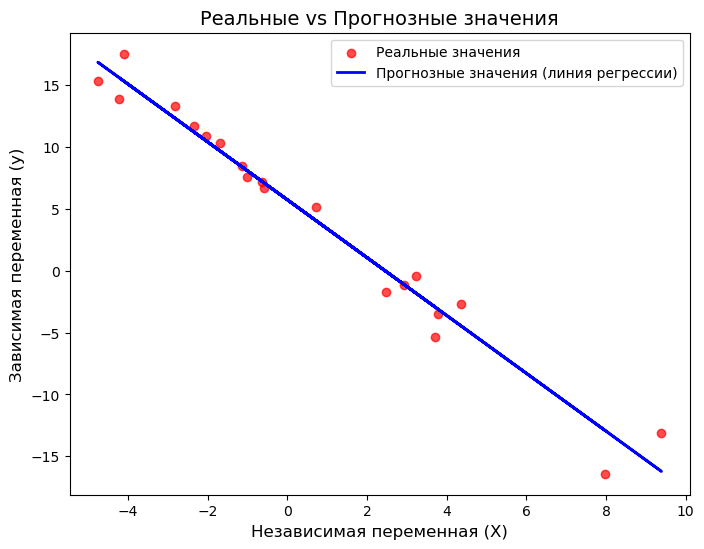


–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏:

–°–≤–æ–±–æ–¥–Ω—ã–π —á–ª–µ–Ω (b0): 5.741

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –Ω–∞–∫–ª–æ–Ω–∞ (b1): -2.339


In [17]:
# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –ø—Ä–∏–∑–Ω–∞–∫–∏ (X) –∏ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é (y)
X = df3.iloc[:, 0].values.reshape(-1, 1) 
y = df3.iloc[:, 1].values

# –°–æ–∑–¥–∞–Ω–∏–µ –∏ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
model = LinearRegression()
model.fit(X, y)

# –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ –Ω–∞ –æ—Å–Ω–æ–≤–µ –º–æ–¥–µ–ª–∏
y_pred = model.predict(X)

# –†–∞—Å—á–µ—Ç –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
intercept = model.intercept_  
slope = model.coef_[0]     

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –¥–∏–∞–≥—Ä–∞–º–º—ã —Ä–∞—Å—Å–µ—è–Ω–∏—è —Ä–µ–∞–ª—å–Ω—ã—Ö –∏ –ø—Ä–æ–≥–Ω–æ–∑–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.7, label="–†–µ–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è", color='red')
plt.plot(X, y_pred, color='blue', linewidth=2, label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è (–ª–∏–Ω–∏—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏)")
plt.title('–†–µ–∞–ª—å–Ω—ã–µ vs –ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è', fontsize=14)
plt.xlabel('–ù–µ–∑–∞–≤–∏—Å–∏–º–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è (X)', fontsize=12)
plt.ylabel('–ó–∞–≤–∏—Å–∏–º–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è (y)', fontsize=12)
plt.legend()
plt.show()

print("\n–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏:")
print(f"\n–°–≤–æ–±–æ–¥–Ω—ã–π —á–ª–µ–Ω (b0): {intercept:.3f}")
print(f"\n–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –Ω–∞–∫–ª–æ–Ω–∞ (b1): {slope:.3f}")

In [18]:

def mean_approximation_error(y_true, y_pred):
    """
    –†–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ—Ç —Å—Ä–µ–¥–Ω—é—é –æ—à–∏–±–∫—É –∞–ø–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏–∏.
    Args:
        y_true (array-like): –†–µ–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è.
        y_pred (array-like): –ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è.
    Returns:
        float: –°—Ä–µ–¥–Ω—è—è –æ—à–∏–±–∫–∞ –∞–ø–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏–∏ –≤ –ø—Ä–æ—Ü–µ–Ω—Ç–∞—Ö.
    """
    try:
        error = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
        print(f"–°—Ä–µ–¥–Ω—è—è –æ—à–∏–±–∫–∞ –∞–ø–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏–∏: {error:.2f}%")
        return error
    except (ZeroDivisionError, TypeError, ValueError) as e:  
        print(f"–û—à–∏–±–∫–∞! {e}")
        return None

# –†–∞—Å—á–µ—Ç —Å—Ä–µ–¥–Ω–µ–π –æ—à–∏–±–∫–∏ –∞–ø–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏–∏
approximation_error = mean_approximation_error(y, y_pred)

–°—Ä–µ–¥–Ω—è—è –æ—à–∏–±–∫–∞ –∞–ø–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏–∏: 35.26%


In [19]:
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è F-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏
def compute_f_statistic(actual_values, predicted_values, parameters_count):
    """
    –í—ã—á–∏—Å–ª—è–µ—Ç F-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –¥–ª—è –º–æ–¥–µ–ª–∏ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏.
    
    Args:
        actual_values (array-like): –§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π.
        predicted_values (array-like): –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä—É–µ–º—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è.
        parameters_count (int): –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –≤ –º–æ–¥–µ–ª–∏ (–≤–∫–ª—é—á–∞—è —Å–≤–æ–±–æ–¥–Ω—ã–π —á–ª–µ–Ω).
        
    Returns:
        float: –ó–Ω–∞—á–µ–Ω–∏–µ F-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏.
    """
    sample_size = len(actual_values)  # –û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π
    residual_sum_of_squares = np.sum((actual_values - predicted_values) ** 2)  # –û—Å—Ç–∞—Ç–æ—á–Ω–∞—è —Å—É–º–º–∞ –∫–≤–∞–¥—Ä–∞—Ç–æ–≤
    total_sum_of_squares = np.sum((actual_values - np.mean(actual_values)) ** 2)  # –û–±—â–∞—è —Å—É–º–º–∞ –∫–≤–∞–¥—Ä–∞—Ç–æ–≤
    explained_sum_of_squares = total_sum_of_squares - residual_sum_of_squares  # –û–±—ä—è—Å–Ω–µ–Ω–Ω–∞—è —Å—É–º–º–∞ –∫–≤–∞–¥—Ä–∞—Ç–æ–≤

    f_stat = (explained_sum_of_squares / (parameters_count - 1)) / (residual_sum_of_squares / (sample_size - parameters_count))
    return f_stat

params_count = 2

f_statistic_value = compute_f_statistic(y, y_pred, params_count)

print(f"F-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: {f_statistic_value:.3f}")

print("\n–†–µ–∑—É–ª—å—Ç–∞—Ç—ã:")
if f_statistic_value > 4:  # –£—Å–ª–æ–≤–Ω—ã–π –ø–æ—Ä–æ–≥ –¥–ª—è –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏
    print("–ú–æ–¥–µ–ª—å —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –∏–º–µ–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫—É—é –∑–Ω–∞—á–∏–º–æ—Å—Ç—å.")
else:
    print("–ú–æ–¥–µ–ª—å —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –Ω–µ –∏–º–µ–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–π –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏.")


F-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: 592.259

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã:
–ú–æ–¥–µ–ª—å —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –∏–º–µ–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫—É—é –∑–Ω–∞—á–∏–º–æ—Å—Ç—å.


In [20]:
def compute_standard_errors(X_matrix, actual_values, predicted_values):
    """
    –†–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ—Ç —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–µ –æ—à–∏–±–∫–∏ –¥–ª—è –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏.
    
    Args:
        X_matrix (array-like): –ú–∞—Ç—Ä–∏—Ü–∞ –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö (—Å –¥–æ–±–∞–≤–ª–µ–Ω–Ω—ã–º —Å—Ç–æ–ª–±—Ü–æ–º –µ–¥–∏–Ω–∏—Ü –¥–ª—è —Å–≤–æ–±–æ–¥–Ω–æ–≥–æ —á–ª–µ–Ω–∞).
        actual_values (array-like): –§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π.
        predicted_values (array-like): –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä—É–µ–º—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è.
        
    Returns:
        tuple: —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–µ –æ—à–∏–±–∫–∏ –¥–ª—è —Å–≤–æ–±–æ–¥–Ω–æ–≥–æ —á–ª–µ–Ω–∞ –∏ –Ω–∞–∫–ª–æ–Ω–Ω–æ–≥–æ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞.
    """
    sample_size = len(actual_values)
    residual_sum_of_squares = np.sum((actual_values - predicted_values) ** 2)  # –û—Å—Ç–∞—Ç–æ—á–Ω–∞—è —Å—É–º–º–∞ –∫–≤–∞–¥—Ä–∞—Ç–æ–≤
    mean_squared_error = residual_sum_of_squares / (sample_size - 2)  # –°—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è –æ—à–∏–±–∫–∞ (MSE)
    
    X_with_intercept = np.hstack([np.ones((X_matrix.shape[0], 1)), X_matrix])  # –î–æ–±–∞–≤–ª–µ–Ω–∏–µ —Å—Ç–æ–ª–±—Ü–∞ –¥–ª—è —Å–≤–æ–±–æ–¥–Ω–æ–≥–æ —á–ª–µ–Ω–∞
    inverse_XTX = np.linalg.inv(X_with_intercept.T @ X_with_intercept)  # –û–±—Ä–∞—Ç–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞ (X'X)^-1
    standard_errors = np.sqrt(np.diag(inverse_XTX * mean_squared_error))  # –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–µ –æ—à–∏–±–∫–∏
    
    return standard_errors

X_data_with_intercept = X  # –ò—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ
standard_errors = compute_standard_errors(X_data_with_intercept, y, y_pred)

t_stat_intercept = intercept / standard_errors[0]
t_stat_slope = slope / standard_errors[1]

corr_t_statistic = pearson_corr * ((len(y) - 2) ** 0.5) / ((1 - pearson_corr ** 2) ** 0.5)

alpha_level = 0.05
critical_t_value = t.ppf(1 - alpha_level / 2, df=len(y) - 2)

confidence_interval_intercept = (intercept - critical_t_value * standard_errors[0], intercept + critical_t_value * standard_errors[0])
confidence_interval_slope = (slope - critical_t_value * standard_errors[1], slope + critical_t_value * standard_errors[1])

print("–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –∞–Ω–∞–ª–∏–∑–∞ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏:")
print(f"–°–≤–æ–±–æ–¥–Ω—ã–π —á–ª–µ–Ω (b0): {intercept:.3f}")
print(f"–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –Ω–∞–∫–ª–æ–Ω–∞ (b1): {slope:.3f}")
print(f"–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ —Å–≤–æ–±–æ–¥–Ω–æ–≥–æ —á–ª–µ–Ω–∞: {standard_errors[0]:.3f}")
print(f"–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ –Ω–∞–∫–ª–æ–Ω–∞: {standard_errors[1]:.3f}")
print(f"t-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ —Å–≤–æ–±–æ–¥–Ω–æ–≥–æ —á–ª–µ–Ω–∞: {t_stat_intercept:.3f}")
print(f"t-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ –Ω–∞–∫–ª–æ–Ω–∞: {t_stat_slope:.3f}")
print(f"–ö—Ä–∏—Ç–∏—á–µ—Å–∫–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ t (–ø—Ä–∏ Œ± = 0.05): ¬±{critical_t_value:.3f}")
print("\n–î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã –¥–ª—è –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ (95%):")
print(f"–°–≤–æ–±–æ–¥–Ω—ã–π —á–ª–µ–Ω: {confidence_interval_intercept}")
print(f"–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –Ω–∞–∫–ª–æ–Ω–∞: {confidence_interval_slope}")
print("\n–í—ã–≤–æ–¥ –æ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–π –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏:")
if abs(t_stat_intercept) > critical_t_value:
    print("–°–≤–æ–±–æ–¥–Ω—ã–π —á–ª–µ–Ω (b0) —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º.")
else:
    print("–°–≤–æ–±–æ–¥–Ω—ã–π —á–ª–µ–Ω (b0) –Ω–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º.")

if abs(t_stat_slope) > critical_t_value:
    print("–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –Ω–∞–∫–ª–æ–Ω–∞ (b1) —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º.")
else:
    print("–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –Ω–∞–∫–ª–æ–Ω–∞ (b1) –Ω–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º.")

if abs(corr_t_statistic) > critical_t_value:
    print("–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º.")
else:
    print("–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –Ω–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º.")

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –∞–Ω–∞–ª–∏–∑–∞ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏:
–°–≤–æ–±–æ–¥–Ω—ã–π —á–ª–µ–Ω (b0): 5.741
–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –Ω–∞–∫–ª–æ–Ω–∞ (b1): -2.339
–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ —Å–≤–æ–±–æ–¥–Ω–æ–≥–æ —á–ª–µ–Ω–∞: 0.376
–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ –Ω–∞–∫–ª–æ–Ω–∞: 0.096
t-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ —Å–≤–æ–±–æ–¥–Ω–æ–≥–æ —á–ª–µ–Ω–∞: 15.288
t-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ –Ω–∞–∫–ª–æ–Ω–∞: -24.336
–ö—Ä–∏—Ç–∏—á–µ—Å–∫–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ t (–ø—Ä–∏ Œ± = 0.05): ¬±2.101

–î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã –¥–ª—è –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ (95%):
–°–≤–æ–±–æ–¥–Ω—ã–π —á–ª–µ–Ω: (4.951844435634772, 6.529680463057639)
–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –Ω–∞–∫–ª–æ–Ω–∞: (-2.5410697545475003, -2.137201727680769)

–í—ã–≤–æ–¥ –æ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–π –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏:
–°–≤–æ–±–æ–¥–Ω—ã–π —á–ª–µ–Ω (b0) —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º.
–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –Ω–∞–∫–ª–æ–Ω–∞ (b1) —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫

In [21]:
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è —Ä–∞—Å—á–µ—Ç–∞ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
def calculate_prediction_interval(x_value, independent_vars, actual_values, predicted_values, model_intercept, model_slope, significance_level=0.05):
    """
    –í—ã—á–∏—Å–ª—è–µ—Ç –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è –æ–∂–∏–¥–∞–µ–º–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è y –ø—Ä–∏ –∑–∞–¥–∞–Ω–Ω–æ–º x_value.
    
    Args:
        x_value (float): –ó–Ω–∞—á–µ–Ω–∏–µ –Ω–µ–∑–∞–≤–∏—Å–∏–º–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π (x), –¥–ª—è –∫–æ—Ç–æ—Ä–æ–≥–æ –Ω—É–∂–Ω–æ –ø–æ–ª—É—á–∏—Ç—å –ø—Ä–æ–≥–Ω–æ–∑ y.
        independent_vars (array-like): –ù–µ–∑–∞–≤–∏—Å–∏–º—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ.
        actual_values (array-like): –§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –∑–∞–≤–∏—Å–∏–º–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π.
        predicted_values (array-like): –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä—É–µ–º—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è.
        model_intercept (float): –°–≤–æ–±–æ–¥–Ω—ã–π —á–ª–µ–Ω –º–æ–¥–µ–ª–∏.
        model_slope (float): –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –Ω–∞–∫–ª–æ–Ω–∞ –º–æ–¥–µ–ª–∏.
        significance_level (float): –£—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –¥–ª—è –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞.
        
    Returns:
        tuple: –ü—Ä–æ–≥–Ω–æ–∑–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ y –∏ –µ–≥–æ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª.
    """
    num_samples = len(actual_values)
    residual_sum_of_squares = np.sum((actual_values - predicted_values) ** 2)  # –û—Å—Ç–∞—Ç–æ—á–Ω–∞—è —Å—É–º–º–∞ –∫–≤–∞–¥—Ä–∞—Ç–æ–≤
    mean_squared_error = residual_sum_of_squares / (num_samples - 2)  # –°—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è –æ—à–∏–±–∫–∞

    # –°—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ x
    x_average = np.mean(independent_vars)

    # –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
    standard_error_prediction = np.sqrt(
        mean_squared_error * (1 + (1 / num_samples) + ((x_value - x_average) ** 2) / np.sum((independent_vars - x_average) ** 2))
    )

    # –ö—Ä–∏—Ç–∏—á–µ—Å–∫–æ–µ t-–∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –∑–∞–¥–∞–Ω–Ω–æ–≥–æ —É—Ä–æ–≤–Ω—è –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏
    t_value_critical = t.ppf(1 - significance_level / 2, df=num_samples - 2)

    # –ü—Ä–æ–≥–Ω–æ–∑–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ y
    predicted_y_value = model_intercept + model_slope * x_value

    # –î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª
    lower_bound = predicted_y_value - t_value_critical * standard_error_prediction
    upper_bound = predicted_y_value + t_value_critical * standard_error_prediction

    return predicted_y_value, (lower_bound, upper_bound)

# –ó–Ω–∞—á–µ–Ω–∏–µ x_value –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
x_value_for_prediction = 6

# –ü—Ä–æ–≥–Ω–æ–∑–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –∏ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª
predicted_y, confidence_interval = calculate_prediction_interval(x_value_for_prediction, X.flatten(), y, y_pred, intercept, slope)

# –í—ã–≤–æ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞
print("\n–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –¥–ª—è x_value = 6:")
print(f"\n–ü—Ä–æ–≥–Ω–æ–∑–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ y: {predicted_y:.3f}")
print(f"\n–î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª: ({confidence_interval[0]:.3f}, {confidence_interval[1]:.3f})")


–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –¥–ª—è x_value = 6:

–ü—Ä–æ–≥–Ω–æ–∑–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ y: -8.294

–î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª: (-12.017, -4.571)


## –ó–∞–¥–∞–Ω–∏–µ ‚Ññ4. –ü—Ä–æ–≤–µ–¥–∏—Ç–µ –ª–∏–Ω–µ–π–Ω—ã–π —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö –∏–∑ —Ñ–∞–π–ª–∞ 'ex4.csv'

In [23]:
# —Å—á–∏—Ç—ã–≤–∞–Ω–∏–µ —Ñ–∞–π–ª–∞
df4 = pd.read_csv('ex4.csv') 

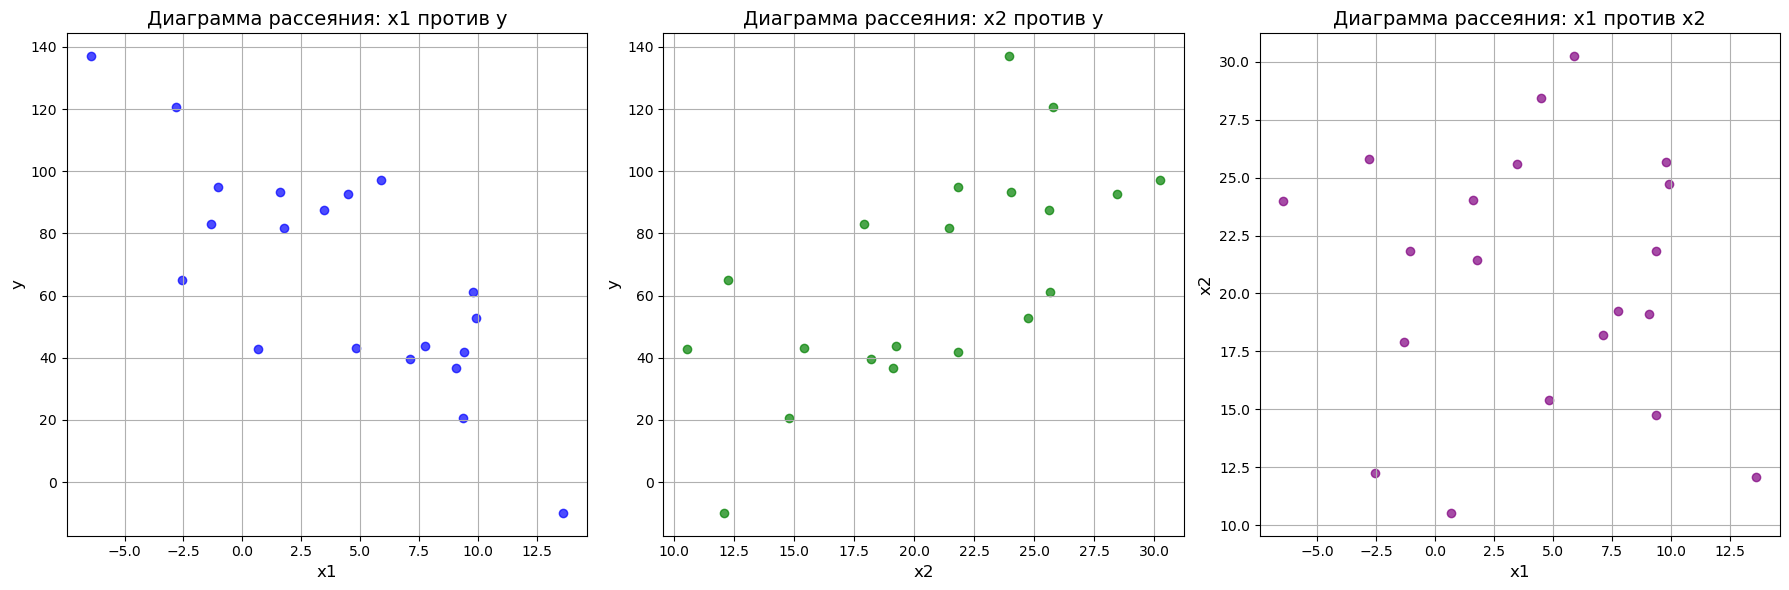

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞:
x1 –ø—Ä–æ—Ç–∏–≤ y: –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç = -0.788, P-–∑–Ω–∞—á–µ–Ω–∏–µ = 3.723e-05
x2 –ø—Ä–æ—Ç–∏–≤ y: –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç = 0.670, P-–∑–Ω–∞—á–µ–Ω–∏–µ = 1.234e-03
x1 –ø—Ä–æ—Ç–∏–≤ x2: –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç = -0.075, P-–∑–Ω–∞—á–µ–Ω–∏–µ = 7.533e-01

–í—ã–≤–æ–¥—ã:
x1 –∏ x2 –Ω–µ –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É—é—Ç —Å–∏–ª—å–Ω–æ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ (–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç = -0.075). –ú–æ–¥–µ–ª—å –º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –º–æ–∂–µ—Ç –±—ã—Ç—å –ø—Ä–∏–º–µ–Ω–∏–º–∞.


In [24]:
# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∏–º–µ–Ω —Å—Ç–æ–ª–±—Ü–æ–≤ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞
feature1, feature2, target = df4.columns[0], df4.columns[1], df4.columns[2]

# –°–æ–∑–¥–∞–Ω–∏–µ –¥–∏–∞–≥—Ä–∞–º–º —Ä–∞—Å—Å–µ—è–Ω–∏—è
plt.figure(figsize=(18, 6))

# feature1 vs target
plt.subplot(1, 3, 1)
plt.scatter(df4[feature1], df4[target], alpha=0.7, color='blue')
plt.title(f'–î–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å—Å–µ—è–Ω–∏—è: {feature1} –ø—Ä–æ—Ç–∏–≤ {target}', fontsize=14)
plt.xlabel(feature1, fontsize=12)
plt.ylabel(target, fontsize=12)
plt.grid(True)

# feature2 vs target
plt.subplot(1, 3, 2)
plt.scatter(df4[feature2], df4[target], alpha=0.7, color='green')
plt.title(f'–î–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å—Å–µ—è–Ω–∏—è: {feature2} –ø—Ä–æ—Ç–∏–≤ {target}', fontsize=14)
plt.xlabel(feature2, fontsize=12)
plt.ylabel(target, fontsize=12)
plt.grid(True)

# feature1 vs feature2
plt.subplot(1, 3, 3)
plt.scatter(df4[feature1], df4[feature2], alpha=0.7, color='purple')
plt.title(f'–î–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å—Å–µ—è–Ω–∏—è: {feature1} –ø—Ä–æ—Ç–∏–≤ {feature2}', fontsize=14)
plt.xlabel(feature1, fontsize=12)
plt.ylabel(feature2, fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

# –í—ã—á–∏—Å–ª–µ–Ω–∏–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏
correlation_feature1_target, p_value_feature1_target = pearsonr(df4[feature1], df4[target])
correlation_feature2_target, p_value_feature2_target = pearsonr(df4[feature2], df4[target])
correlation_feature1_feature2, p_value_feature1_feature2 = pearsonr(df4[feature1], df4[feature2])

# –ü–µ—á–∞—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞
print("–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞:")
print(f"{feature1} –ø—Ä–æ—Ç–∏–≤ {target}: –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç = {correlation_feature1_target:.3f}, P-–∑–Ω–∞—á–µ–Ω–∏–µ = {p_value_feature1_target:.3e}")
print(f"{feature2} –ø—Ä–æ—Ç–∏–≤ {target}: –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç = {correlation_feature2_target:.3f}, P-–∑–Ω–∞—á–µ–Ω–∏–µ = {p_value_feature2_target:.3e}")
print(f"{feature1} –ø—Ä–æ—Ç–∏–≤ {feature2}: –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç = {correlation_feature1_feature2:.3f}, P-–∑–Ω–∞—á–µ–Ω–∏–µ = {p_value_feature1_feature2:.3e}")

# –û—Ü–µ–Ω–∫–∞ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏ –º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
print("\n–í—ã–≤–æ–¥—ã:")
if abs(correlation_feature1_feature2) > 0.7:
    print(f"{feature1} –∏ {feature2} –∏–º–µ—é—Ç –≤—ã—Å–æ–∫—É—é –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é (–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç = {correlation_feature1_feature2:.3f}). –í–æ–∑–º–æ–∂–Ω–∞ –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å. –†–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç—Å—è –∏—Å–∫–ª—é—á–∏—Ç—å –æ–¥–∏–Ω –∏–∑ —Ñ–∞–∫—Ç–æ—Ä–æ–≤.")
else:
    print(f"{feature1} –∏ {feature2} –Ω–µ –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É—é—Ç —Å–∏–ª—å–Ω–æ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ (–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç = {correlation_feature1_feature2:.3f}). –ú–æ–¥–µ–ª—å –º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –º–æ–∂–µ—Ç –±—ã—Ç—å –ø—Ä–∏–º–µ–Ω–∏–º–∞.")

In [25]:
# –°—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö
scaler = StandardScaler()
X_normalized = scaler.fit_transform(df4[[feature1, feature2]])  # –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
y_normalized = scaler.fit_transform(df4[[target]])[:, 0]  # –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –∑–∞–≤–∏—Å–∏–º–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π

# –°–æ–∑–¥–∞–Ω–∏–µ –∏ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
linear_model = LinearRegression()
linear_model.fit(X_normalized, y_normalized)

# –ò–∑–≤–ª–µ—á–µ–Ω–∏–µ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã—Ö –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
beta_coefficients_standardized = linear_model.coef_

# –ü–µ—á–∞—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
print("–°—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ (–±–µ—Ç–∞-–∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã):")
print(f"{feature1}: {beta_coefficients_standardized[0]:.3f}")
print(f"{feature2}: {beta_coefficients_standardized[1]:.3f}")

–°—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ (–±–µ—Ç–∞-–∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã):
x1: -0.742
x2: 0.614


üìà –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã '—á–∏—Å—Ç–æ–π' —Ä–µ–≥—Ä–µ—Å—Å–∏–∏:
–°–≤–æ–±–æ–¥–Ω—ã–π —á–ª–µ–Ω (b0): 6.722
x1: -4.917
x2: 3.893


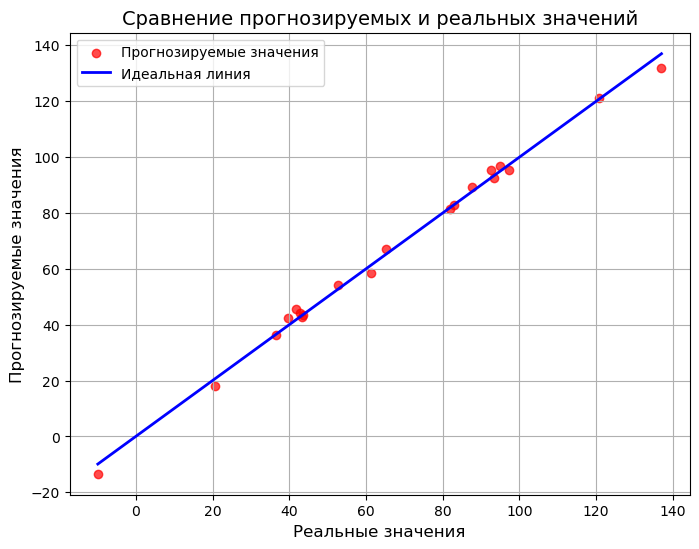

In [26]:
# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ (X) –∏ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é (y)
X_data = df4[[feature1, feature2]].values  # –ù–µ–∑–∞–≤–∏—Å–∏–º—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ
y_data = df4[target].values  # –¶–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è

# –°–æ–∑–¥–∞–Ω–∏–µ –∏ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
multiple_regression_model = LinearRegression()
multiple_regression_model.fit(X_data, y_data)

# –ü–æ–ª—É—á–µ–Ω–∏–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ "—á–∏—Å—Ç–æ–π" —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
intercept_value = multiple_regression_model.intercept_  # –°–≤–æ–±–æ–¥–Ω—ã–π —á–ª–µ–Ω
coefficients_multiple_regression = multiple_regression_model.coef_  # –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã —Ä–µ–≥—Ä–µ—Å—Å–∏–∏

# –ü–µ—á–∞—Ç—å –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤
print("üìà –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã '—á–∏—Å—Ç–æ–π' —Ä–µ–≥—Ä–µ—Å—Å–∏–∏:")
print(f"–°–≤–æ–±–æ–¥–Ω—ã–π —á–ª–µ–Ω (b0): {intercept_value:.3f}")
print(f"{feature1}: {coefficients_multiple_regression[0]:.3f}")
print(f"{feature2}: {coefficients_multiple_regression[1]:.3f}")

# –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏–π y
y_predictions = multiple_regression_model.predict(X_data)
# –°–æ–∑–¥–∞–Ω–∏–µ –¥–∏–∞–≥—Ä–∞–º–º—ã —Ä–∞—Å—Å–µ—è–Ω–∏—è –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –ø—Ä–æ–≥–Ω–æ–∑–Ω—ã—Ö –∏ —Ä–µ–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
plt.figure(figsize=(8, 6))
plt.scatter(y_data, y_predictions, alpha=0.7, color='red', label='–ü—Ä–æ–≥–Ω–æ–∑–∏—Ä—É–µ–º—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.plot([min(y_data), max(y_data)], [min(y_data), max(y_data)], color='blue', linewidth=2, label='–ò–¥–µ–∞–ª—å–Ω–∞—è –ª–∏–Ω–∏—è')
plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä—É–µ–º—ã—Ö –∏ —Ä–µ–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π', fontsize=14)
plt.xlabel('–†–µ–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è', fontsize=12)
plt.ylabel('–ü—Ä–æ–≥–Ω–æ–∑–∏—Ä—É–µ–º—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [27]:
# –í—ã—á–∏—Å–ª–µ–Ω–∏–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ –º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏
r_squared_value = r2_score(y, y_pred)
multiple_correlation_coefficient = r_squared_value ** 0.5  # –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ (R)

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —á–∏—Å–ª–∞ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π –∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
num_observations = len(y)  # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π
num_parameters = X.shape[1] + 1  # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ (–≤–∫–ª—é—á–∞—è —Å–≤–æ–±–æ–¥–Ω—ã–π —á–ª–µ–Ω)

# –í—ã—á–∏—Å–ª–µ–Ω–∏–µ F-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏
f_statistic_value = (r_squared_value / (num_parameters - 1)) / ((1 - r_squared_value) / (num_observations - num_parameters))

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫—Ä–∏—Ç–∏—á–µ—Å–∫–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è F
alpha_level = 0.05  # –£—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏
f_critical_value = f.ppf(1 - alpha_level, dfn=num_parameters - 1, dfd=num_observations - num_parameters)

# –ü–µ—á–∞—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
print("–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏:")
print(f"R (–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏): {multiple_correlation_coefficient:.3f}")
print(f"R¬≤ (–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏): {r_squared_value:.3f}")

print("\n–ó–Ω–∞—á–µ–Ω–∏–µ F-–∫—Ä–∏—Ç–µ—Ä–∏—è:")
print(f"F-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: {f_statistic_value:.3f}")
print(f"–ö—Ä–∏—Ç–∏—á–µ—Å–∫–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ F (–ø—Ä–∏ Œ± = {alpha_level}): {f_critical_value:.3f}")

# –û—Ü–µ–Ω–∫–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–π –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏
print("\n–û—Ü–µ–Ω–∫–∞ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏:")
if f_statistic_value > f_critical_value:
    print("–ú–æ–¥–µ–ª—å —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ —è–≤–ª—è–µ—Ç—Å—è —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–æ–π.")
else:
    print("–ú–æ–¥–µ–ª—å —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –Ω–µ –∏–º–µ–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–π –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏.")

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏:
R (–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏): 0.985
R¬≤ (–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏): 0.971

–ó–Ω–∞—á–µ–Ω–∏–µ F-–∫—Ä–∏—Ç–µ—Ä–∏—è:
F-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: 592.259
–ö—Ä–∏—Ç–∏—á–µ—Å–∫–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ F (–ø—Ä–∏ Œ± = 0.05): 4.414

–û—Ü–µ–Ω–∫–∞ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏:
–ú–æ–¥–µ–ª—å —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ —è–≤–ª—è–µ—Ç—Å—è —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–æ–π.


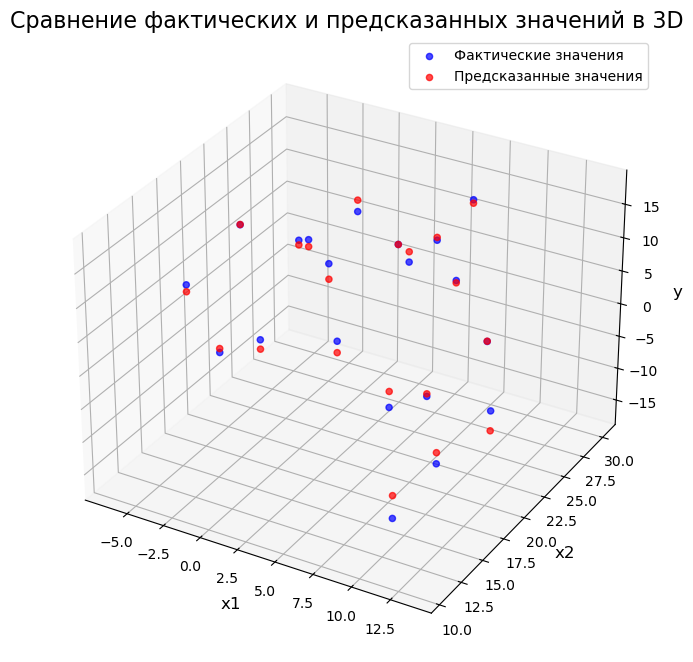

In [28]:
# –ò–∑–≤–ª–µ—á–µ–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏–π –¥–ª—è –≥—Ä–∞—Ñ–∏–∫–∞
x1_data = df4['x1'].values  # –ü–µ—Ä–≤—ã–π –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã–π –ø—Ä–∏–∑–Ω–∞–∫
x2_data = df4['x2'].values  # –í—Ç–æ—Ä–æ–π –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã–π –ø—Ä–∏–∑–Ω–∞–∫
y_actual = y  # –§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –∑–∞–≤–∏—Å–∏–º–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
y_predictions = model.predict(X)  # –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è

# –°–æ–∑–¥–∞–Ω–∏–µ —Ç—Ä–µ—Ö–º–µ—Ä–Ω–æ–≥–æ –≥—Ä–∞—Ñ–∏–∫–∞
figure = plt.figure(figsize=(12, 8))
axis = figure.add_subplot(111, projection='3d')

# –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π
axis.scatter(x1_data, x2_data, y_actual, color='blue', label='–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è', alpha=0.7)

# –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
axis.scatter(x1_data, x2_data, y_predictions, color='red', label='–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è', alpha=0.7)

# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –≥—Ä–∞—Ñ–∏–∫–∞
axis.set_title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏—Ö –∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ 3D', fontsize=16)
axis.set_xlabel('x1', fontsize=12)
axis.set_ylabel('x2', fontsize=12)
axis.set_zlabel('y', fontsize=12)
axis.legend()
plt.show()